# Previsão de preços de casas na Califórnia

o objetivo é prever o valor médio de uma casa na Califórnia com base em características como localização, número de quartos, idade da casa e informações sobre o bairro.

Este conjunto de dados do sklearn fornece informações sobre os valores medianos das casas e características dos setores censitários na Califórnia. Ele possui 20.640 registros e 8 variáveis explicativas.

variáveis no conjunto de dados:


MedInc - A renda mediana no bloco.

HouseAge - A idade média das casas no bloco.

AveRooms - O número médio de cômodos por residência.

AveBedrms - O número médio de quartos por residência.

População - A população do bloco.

AveOccup - A ocupação média do agregado familiar.

Latitude - A latitude do bloco em graus decimais.

Longitude - A longitude do bloco em graus decimais.

In [114]:
# Importando o conjunto de dados "fetch_california_housing"
from sklearn.datasets import fetch_california_housing

# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [79]:
# Carrega o conjunto de dados de habitação da Califórnia
dados = fetch_california_housing()
dados

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [94]:
# Criando o DataFrame a partir dos dados e das colunas
df = pd.DataFrame(data=dados.data, columns=dados.feature_names)
df["target"] = dados.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Calculando a Correlação entre as variáveis

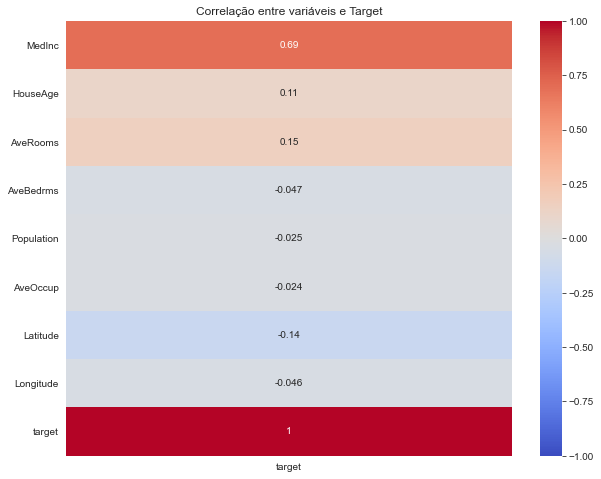

In [95]:
# Selecionando as colunas de interesse
colunas_interesse = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']
df_selecionado = df[colunas_interesse]

# Calculando a matriz de correlação
correlacao = df_selecionado.corr()

# Exibindo a matriz de correlação com foco no 'target'
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao[['target']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title("Correlação entre variáveis e Target")
plt.show()

# Regressão Linear Simples

In [148]:
# criando o x e o y
x = df.MedInc
y = df.target

In [153]:
# Separando os dados entre treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [154]:
# realizando a regressão linear simples

# criando regressor
reg = LinearRegression().fit(X_train.values.reshape(-1,1),y_train)
reg

LinearRegression()

In [155]:
y_pred_simp= reg.predict(X_test.values.reshape(-1,1))
y_pred_simp

array([1.15039433, 1.50515684, 1.9011087 , ..., 2.04942371, 2.2832473 ,
       1.59354492])

In [156]:
#importando métrica de erro quadrático e absoluto
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [157]:
Erro_abs = mean_absolute_error(y_test, y_pred_simp)
Erro_quad = mean_squared_error(y_test, y_pred_simp)

In [158]:
# Avaliando o erro
print("Erro Absoluto Médio Regressão simples:", Erro_abs)
print("Erro Quadrático Médio Regressão simples:", Erro_quad)


Erro Absoluto Médio Regressão simples: 0.6265986453094173
Erro Quadrático Médio Regressão simples: 0.7028461448540976


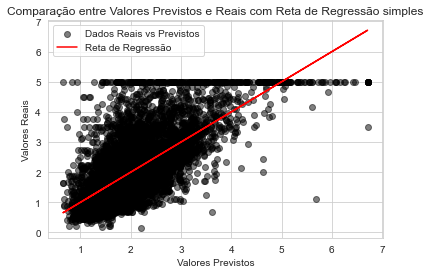

In [159]:
# Gerando o gráfico
fig, ax = plt.subplots()
ax.scatter(y_pred_simp, y_test, color="black", alpha=0.5, label="Dados Reais vs Previstos")

# Adicionando a reta de regressão
ax.plot(y_pred_simp, y_pred_simp, color="red", linestyle="-", label="Reta de Regressão")

# Adicionando título e rótulos aos eixos
ax.set_title("Comparação entre Valores Previstos e Reais com Reta de Regressão simples")
ax.set_xlabel("Valores Previstos")
ax.set_ylabel("Valores Reais")
ax.legend()


# Exibindo o gráfico
plt.show()

In [162]:
# Calculando os resíduos
residuos = y_test - y_pred_simp

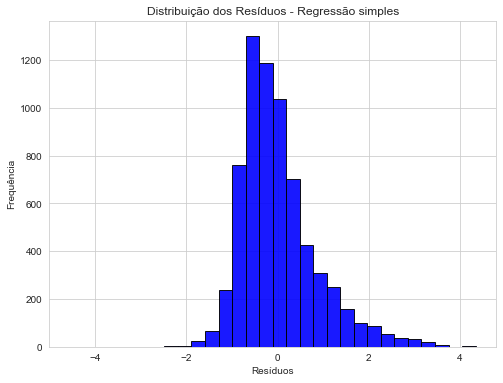

In [163]:
# Gráfico de histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color="blue", edgecolor="black", alpha=0.9)
plt.title("Distribuição dos Resíduos - Regressão simples")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")

# Exibindo o gráfico
plt.show()

# Regressão Linear múltipla

In [164]:
# criando o x e o y
x = df[['MedInc', 'HouseAge', 'AveRooms']]
y = df.target

In [165]:
# Separando os dados entre treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [166]:
# realizando a regressão linear MULTIPLA

# criando regressor
reg = LinearRegression().fit(X_train,y_train)
reg

LinearRegression()

In [167]:
reg.coef_

array([ 0.44096476,  0.01668983, -0.02574923])

In [168]:
reg.intercept_

0.02045931460926509

In [169]:
y_pred_mult = reg.predict(X_test)
y_pred_mult

array([1.07110908, 1.50760806, 2.32052327, ..., 1.7968234 , 1.9672767 ,
       1.98193263])

In [170]:
Erro_abs_mult = mean_absolute_error(y_test, y_pred_mult)
Erro_quad_mul = mean_squared_error(y_test, y_pred_mult)

In [171]:
# Avaliando o erro
print("Erro Absoluto Médio Regressão Múltipla:", Erro_abs_mult)
print("Erro Quadrático Médio Múltipla:", Erro_quad_mul)


Erro Absoluto Médio Regressão Múltipla: 0.5998888673564778
Erro Quadrático Médio Múltipla: 0.6491115705571756


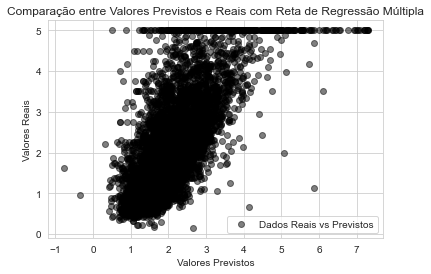

In [172]:
# Gerando o gráfico
fig, ax = plt.subplots()
ax.scatter(y_pred_mult, y_test, color="Black", alpha=0.5, label="Dados Reais vs Previstos")

# Adicionando título e rótulos aos eixos
ax.set_title("Comparação entre Valores Previstos e Reais com Reta de Regressão Múltipla")
ax.set_xlabel("Valores Previstos")
ax.set_ylabel("Valores Reais")
ax.legend()

# Exibindo o gráfico
plt.show()

In [173]:
# Calculando os resíduos
residuos = y_test - y_pred_mult

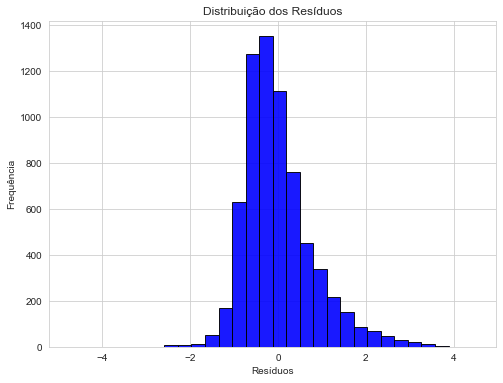

In [174]:
# Gráfico de histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color="blue", edgecolor="black", alpha=0.9)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")

# Exibindo o gráfico
plt.show()

# Comparando os erros entre os dois modelos

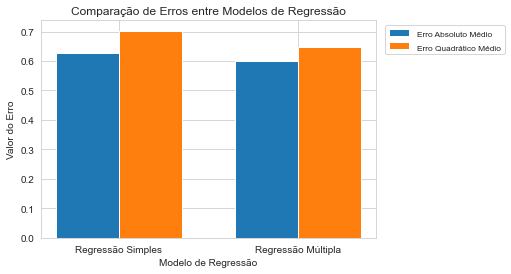

<Figure size 720x720 with 0 Axes>

In [204]:
Erro_abs 
Erro_quad
Erro_abs_mult
Erro_quad_mul

# Criando os dados para o gráfico
labels = ['Regressão Simples', 'Regressão Múltipla']
erro_absoluto = [Erro_abs, Erro_abs_mult]
erro_quadratico = [Erro_quad, Erro_quad_mul]

x = np.arange(len(labels))  # Posição das barras no eixo x
width = 0.35  # Largura das barras

# Criando o gráfico
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, erro_absoluto, width, label='Erro Absoluto Médio')
rects2 = ax.bar(x + width/2, erro_quadratico, width, label='Erro Quadrático Médio')

# Adicionando rótulos e título
ax.set_xlabel('Modelo de Regressão')
ax.set_ylabel('Valor do Erro')
ax.set_title('Comparação de Erros entre Modelos de Regressão')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Adicionando a legenda com personalizações
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), ncol=1)
# Ajustando o tamanho da fonte da legenda
for label in legend.get_texts():
    label.set_fontsize('small')

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 10))

# Ajustando o espaçamento entre os elementos
plt.subplots_adjust(right=0.8)

# Mostrando o gráfico
plt.show()